<a href="https://colab.research.google.com/github/Evanaxander/Machine-Learning-Algorithms-with-codes/blob/main/Random_Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Overview

Random forests are a popular supervised machine learning algorithm that can handle both regression and classification tasks. Below are some of the main characteristics of random forests:



*   LRandom forests are for supervised machine learning, where there is a labeled target variable.

*  Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
*  Random forests are an ensemble method, meaning they combine predictions from other models.


*   Each of the smaller models in the random forest ensemble is a decision tree.



# How Random Forest Classification Works

Imagine you have a complex problem to solve, and you gather a group of experts from different fields to provide their input. Each expert provides their opinion based on their expertise and experience. Then, the experts would vote to arrive at a final decision.

In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree and then taking the most popular result. (For regression, predictions use an averaging technique instead.)

In the diagram below, we have a random forest with n decision trees, and we’ve shown the first 5, along with their predictions (either “Dog” or “Cat”). Each tree is exposed to a different number of features and a different sample of the original dataset, and as such, every tree can be different. Each tree makes a prediction.

Looking at the first 5 trees, we can see that 4/5 predicted the sample was a Cat. The green circles indicate a hypothetical path the tree took to reach its decision. The random forest would count the number of predictions from decision trees for Cat and for Dog, and choose the most popular prediction.

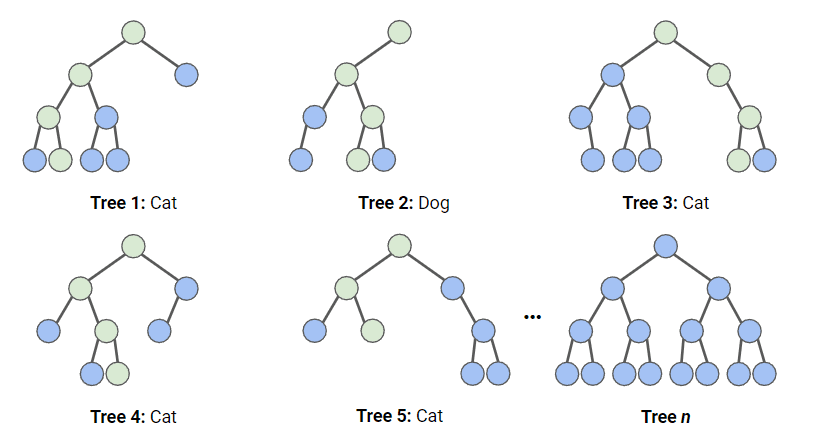

# Load the Dataset

This dataset consists of direct marketing campaigns by a Portuguese banking institution using phone calls. The campaigns aimed to sell subscriptions to a bank term deposit. We are going to store this dataset in a variable called bank_data. The columns we will use are:



*   age: The age of the person who received the phone call

*   default: Whether the person has credit in default

*   cons.price.idx: Consumer price index score at the time of the call
*   cons.conf.idx:Consumer confidence index score at the time of the call


*  y: Whether the person subscribed (this is what we’re trying to predict)






# Importing Packages

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# The Random Forest Workflow

To fit and train this model,I will be following The Machine Learning Workflow infographic; however, as the data is pretty clean, I wont be carrying out every step. the following will be done:


*  Feature engineering (Manipulate the datasets to create variables (features)





that improve your model’s prediction accuracy. Create the same features in both the training set and the testing set.)

*   Splitting the data (Randomly divide the records in the dataset into a training set and a testing set. For a more reliable assessment of model performance, generate multiple training and testing sets using cross validation)
*   Model training


*   Hyperparameter tuning (For each model, use hyperparameter tuning techniques to improve model performance.)

*    Model performance assessment (For each model, calculate performance metrics on the testing set such as accuracy, recall and precision.)



# Preprocessing Data for  Random Forest Classifier

Tree-based models are much more robust to outliers than linear models, and they do not need variables to be normalized to work. As such, I need to do very little preprocessing on the data.


*   I will map our default column, which contains no and yes, to 0s and 1s, respectively. I will treat unknown values as no for this example.
*   I will also map the target, y, to 1s and 0s.




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

100%|██████████| 142k/142k [00:00<00:00, 47.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1


In [ ]:
# Defining the path to the dataset
file_path = '/root/.cache/kagglehub/datasets/janiobachmann/bank-marketing-dataset/versions/1/bank.csv'

# Loading the dataset into a DataFrame
bank_data = pd.read_csv(file_path, sep=';')

# Displaying the first few rows of the dataset
print(bank_data.head())

  age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0  59,admin.,married,secondary,no,2343,yes,no,unk...                                                                        
1  56,admin.,married,secondary,no,45,no,no,unknow...                                                                        
2  41,technician,married,secondary,no,1270,yes,no...                                                                        
3  55,services,married,secondary,no,2476,yes,no,u...                                                                        
4  54,admin.,married,tertiary,no,184,no,no,unknow...                                                                        


In [ ]:

# Check if the 'default' column exists in the DataFrame
if 'default' in bank_data.columns:
    # If it exists, proceed with the mapping
    bank_data['default'] = bank_data['default'].map({'no': 0, 'yes': 1, 'unknown': 0})
else:
    # If it doesn't exist, print an informative message
    print("Column 'default' not found in the DataFrame.")

# Check if the 'deposit' column (previously 'y') exists before mapping
if 'deposit' in bank_data.columns:
    # Continue with mapping the 'deposit' column as a binary variable
    bank_data['deposit'] = bank_data['deposit'].map({'no': 0, 'yes': 1})
else:
    print("Column 'deposit' not found in the DataFrame. Check the column names.")

# Display the updated dataset preview
print("Updated dataset preview:")
print(bank_data.head())

Column 'default' not found in the DataFrame.
Column 'deposit' not found in the DataFrame. Check the column names.
Updated dataset preview:
  age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0  59,admin.,married,secondary,no,2343,yes,no,unk...                                                                        
1  56,admin.,married,secondary,no,45,no,no,unknow...                                                                        
2  41,technician,married,secondary,no,1270,yes,no...                                                                        
3  55,services,married,secondary,no,2476,yes,no,u...                                                                        
4  54,admin.,married,tertiary,no,184,no,no,unknow...                                                                        


Explanation of Changes:

Check for 'y' Column: Before attempting to map values in the 'y' column, we now check if it actually exists using if 'y' in bank_data.columns:.
Informative Message: If the 'y' column is not found, an informative message is printed to the console, guiding the user to verify the column names in their DataFrame. This helps in identifying the root cause of the error.

This code is written in Python and it is used to map categorical values to numerical values in a Pandas DataFrame called bank_data.


The first line of code maps the values in the 'default' column of the DataFrame to numerical values. The dictionary passed to the map() function maps 'no' to 0, 'yes' to 1, and 'unknown' to 0. This means that all 'no' and 'unknown' values in the 'default' column will be mapped to 0, while all 'yes' values will be mapped to 1. The resulting numerical values are then stored in a new column called 'default'.


The second line of code does the same thing for the 'y' column of the DataFrame. The dictionary passed to the map() function maps 'no' to 0 and 'yes' to 1. This means that all 'no' values in the 'y' column will be mapped to 0, while all 'yes' values will be mapped to 1. The resulting numerical values are then stored in a new column called 'y'.


Overall, this code is useful for converting categorical data into numerical data, which can be easier to work with in certain types of analyses.

# Splitting the Data

When training any supervised learning model, it is important to split the data into training and test data. The training data is used to fit the model. The algorithm uses the training data to learn the relationship between the features and the target. The test data is used to evaluate the performance of the model.

The code below splits the data into separate variables for the features and target, then splits into training and test data.

In [ ]:
print(bank_data.columns)

Index(['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit'], dtype='object')


In [ ]:
# Strip spaces from column names
bank_data.columns = bank_data.columns.str.strip()


In [ ]:
if 'y' in bank_data.columns:
    bank_data['y'] = bank_data['y'].map({'no': 0, 'yes': 1})
else:
    print("Column 'y' not found in the DataFrame.")


Column 'y' not found in the DataFrame.


In [ ]:
# Display column names before splitting
print("Columns in dataset before splitting:", bank_data.columns.tolist())

# Ensure 'deposit' exists before proceeding
if 'deposit' in bank_data.columns:
    # Map 'deposit' column to binary values
    bank_data['deposit'] = bank_data['deposit'].map({'no': 0, 'yes': 1})
    print("Mapping completed successfully for 'deposit'.")
else:
    print("Error: Column 'deposit' not found in the dataset.")

# Proceed with feature-target split
try:
    X = bank_data.drop(columns=['deposit'])  # Drop the target column
    y = bank_data['deposit']  # Define the target variable

    # Split the dataset into training and testing sets
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print shapes of the training and testing sets
    print("Training set shape:", X_train.shape, y_train.shape)
    print("Testing set shape:", X_test.shape, y_test.shape)
except KeyError as e:
    print(f"KeyError during split: {e}")


Columns in dataset before splitting: ['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit']
Error: Column 'deposit' not found in the dataset.
KeyError during split: "['deposit'] not found in axis"


This code is written in Python and it is used to split the data into training and test sets for a machine learning model.


First, the code separates the features (X) and target (y) variables from the original dataset bank_data using the drop() method. The drop() method is used to remove a specified column from the dataset. In this case, the column 'y' is removed from the dataset and assigned to the variable X. The column 'y' is assigned to the variable y.


Next, the train_test_split() function from the scikit-learn library is used to split the data into training and test sets. The function takes four arguments: the features (X), the target (y), the test size (0.2 in this case), and a random state (which is not specified in this code). The test size argument specifies the proportion of the data that should be used for testing the model. In this case, 20% of the data is used for testing and 80% is used for training.


The function returns four variables: X_train, X_test, y_train, and y_test. These variables contain the training and test sets for the features and target variables. The training sets are used to train the machine learning model, and the test sets are used to evaluate the performance of the model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Display column names before splitting
print("Columns in dataset before splitting:", bank_data.columns.tolist())

# Ensure 'deposit' exists before proceeding
if 'deposit' in bank_data.columns:
    # Map 'deposit' column to binary values
    bank_data['deposit'] = bank_data['deposit'].map({'no': 0, 'yes': 1})
    print("Mapping completed successfully for 'deposit'.")
else:
    print("Error: Column 'deposit' not found in the dataset.")

# Proceed with feature-target split
try:
    X = bank_data.drop(columns=['deposit'])  # Drop the target column
    y = bank_data['deposit']  # Define the target variable

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Print shapes of the training and testing sets
    print("Training set shape:", X_train.shape, y_train.shape)
    print("Testing set shape:", X_test.shape, y_test.shape)
except KeyError as e:
    print(f"KeyError during split: {e}")

# Now you can use X_train and y_train to fit the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train) # X_train and y_train are now accessible in this scope

Columns in dataset before splitting: ['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit']
Error: Column 'deposit' not found in the dataset.
KeyError during split: "['deposit'] not found in axis"


NameError: name 'X_train' is not defined

### Fitting and Evaluating the Random Forest Model

We first create an instance of the Random forest model with the default parameters. We then fit this to our training data. We pass both the features and the target variable so the model can learn.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

At this point, we have a trained random forest model, but we need to find out whether it makes accurate predictions.

In [ ]:
y_pred = rf.predict(X_test)

NameError: name 'X_test' is not defined

The simplest way to evaluate this model is using accuracy; we check the predictions against the actual values in the test set and count up how many the model got right.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

NameError: name 'y_test' is not defined

In [ ]:
Accuracy: 0.888

This is a pretty good score! However, we may be able to do better by optimizing our hyperparameters.

# Visualizing the Results

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

Each tree image is limited to only showing the first few nodes. These trees can get very large and difficult to visualize. The colors represent the majority class of each node (box, with red indicating majority 0 (no subscription) and blue indicating majority 1 (subscription). The colors get darker the closer the node gets to being fully 0 or 1. Each node also contains the following information:




1.   The variable name and value used for splitting
2. The % of total samples in each split

1.   The % split between classes in each split




# The % split between classes in each split

The code below uses Scikit-Learn’s RandomizedSearchCV, which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:


*   n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
*   max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.




In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

output:

In [ ]:
Best hyperparameters: {'max_depth': 5, 'n_estimators': 260}

SyntaxError: invalid syntax (<ipython-input-46-cd7f65811654>, line 1)

# More Random Forest Evaluation Metrics

Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives (bottom left). We can plot the confusion matrix using this code:

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

NameError: name 'best_rf' is not defined

We should also evaluate the best model with accuracy, precision, and recall (note your results may differ due to randomization)

In [ ]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

NameError: name 'knn' is not defined

output:

In [ ]:
Accuracy: 0.885

Precision: 0.578

Recall: 0.0873

The below code plots the importance of each feature, using the model’s internal score to find the best way to split the data within each decision tree.

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

NameError: name 'best_rf' is not defined

This tells us that the consumer confidence index, at the time of the call, was the biggest predictor of whether the person subscribed.